In [1]:
from datetime import datetime, timedelta
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from simulaciones import *
from prioridad_dinamica import *
sns.set_theme()

In [2]:
df = pd.read_csv('data/muestras_clean.csv')
df = df[df["TurnoMinutosEspera"] < 100]
df = df[df["TAPRecepcionMinutos"] < 20]
df["FechaHoraLLegada"] = pd.to_datetime(df["FechaHoraLLegada"])
df.head()

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
0,316483,COYOACAN,20240301,6,41684208,N015,Solicitar Estudios,06:02:44,06:13:23,13.321135,3.518992,2024-03-01 06:02:44,10,1
1,316499,COYOACAN,20240301,6,41684414,N025,Solicitar Estudios,06:09:35,06:19:43,10.130000,3.518992,2024-03-01 06:09:35,10,0
2,316515,COYOACAN,20240301,6,41684824,N038,Solicitar Estudios,06:18:16,06:30:42,12.430000,3.518992,2024-03-01 06:18:16,10,0
3,316531,COYOACAN,20240301,6,41684679,P004,Triage,06:25:09,06:27:01,1.870000,3.518992,2024-03-01 06:25:09,10,1
4,316547,COYOACAN,20240301,6,41685173,C011,Citado,06:35:09,06:37:47,2.630000,3.518992,2024-03-01 06:35:09,10,0


# Coyoacan

In [ ]:
df_fechas = df[df["Sucursal"]=="COYOACAN"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

In [ ]:
simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("COYOACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=10) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

In [ ]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])

In [ ]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])/len(df_simulacion_atencion)*100

In [ ]:
len(df_simulacion_atencion)

In [ ]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max","std", "count"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)

plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en COYOACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 35, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCOY.png', dpi=300)

# Culiacan

In [ ]:
df_fechas = df[df["Sucursal"]=="CULIACAN"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=7) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

In [ ]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCUL.png', dpi=300)

# CULIACAN CAÑADAS

In [3]:
df_fechas = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN CAÑADAS", df,i)
    df_te = simular_atencion(df_sim, cajas=3) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

C:\Users\Alejandra Velasco\AppData\Local\Temp\ipykernel_33876\3307929844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:01:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 3 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 2 atiende ID 5 (Prioridad 1) - Espera: 2.0 min
06:13:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 4.0 min
06:14:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 3 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 2.0 min
06:18:00 | Caja 3 atiende ID 10 (Prioridad 0) - Espera: 2.0 min
06:19:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 3 atiende ID 11 (Prioridad 0) - Espera: 1.0 min
06:21:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 2.0 min
06:21:00 | Caja 2 atiende ID 14 (Prioridad 0) - Espera: 1.0 min
06:23:00 | Caja 1 atiende ID 15 (Prioridad 1) - Es

10:54:00 | Caja 1 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 2 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 187 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 190 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 191 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 3 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 194 (Prioridad 0) - Espera: 1.0 min
11:37:00 | Caja 2 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 1 atiende

08:21:00 | Caja 1 atiende ID 98 (Prioridad 1) - Espera: 5.0 min
08:21:00 | Caja 2 atiende ID 93 (Prioridad 0) - Espera: 6.0 min
08:22:00 | Caja 3 atiende ID 94 (Prioridad 0) - Espera: 7.0 min
08:23:00 | Caja 1 atiende ID 102 (Prioridad 1) - Espera: 2.0 min
08:24:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 2 atiende ID 99 (Prioridad 0) - Espera: 6.0 min
08:28:00 | Caja 3 atiende ID 100 (Prioridad 0) - Espera: 8.0 min
08:30:00 | Caja 2 atiende ID 101 (Prioridad 0) - Espera: 9.0 min
08:31:00 | Caja 1 atiende ID 104 (Prioridad 1) - Espera: 5.0 min
08:33:00 | Caja 2 atiende ID 105 (Prioridad 1) - Espera: 3.0 min
08:34:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 3.0 min
08:35:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 1 atiende ID 106 (Prioridad 0) - Espera: 6.0 min
08:37:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 1.0 min
08:38:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 2 atiende ID 

14:50:00 | Caja 1 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
14:50:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 2 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 2 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 2 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 3 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 2 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 2 atiende

09:13:00 | Caja 2 atiende ID 147 (Prioridad 0) - Espera: 20.0 min
09:13:00 | Caja 3 atiende ID 149 (Prioridad 1) - Espera: 18.0 min
09:15:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 20.0 min
09:16:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 20.0 min
09:16:00 | Caja 2 atiende ID 152 (Prioridad 1) - Espera: 20.0 min
09:17:00 | Caja 3 atiende ID 153 (Prioridad 1) - Espera: 20.0 min
09:18:00 | Caja 1 atiende ID 154 (Prioridad 1) - Espera: 21.0 min
09:18:00 | Caja 2 atiende ID 156 (Prioridad 1) - Espera: 20.0 min
09:20:00 | Caja 3 atiende ID 148 (Prioridad 0) - Espera: 26.0 min
09:22:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 23.0 min
09:22:00 | Caja 2 atiende ID 155 (Prioridad 0) - Espera: 24.0 min
09:23:00 | Caja 3 atiende ID 159 (Prioridad 1) - Espera: 16.0 min
09:26:00 | Caja 2 atiende ID 158 (Prioridad 0) - Espera: 21.0 min
09:26:00 | Caja 3 atiende ID 160 (Prioridad 1) - Espera: 18.0 min
09:27:00 | Caja 1 atiende ID 161 (Prioridad 1) - Espera: 16.0 min
09:30:00 |

15:17:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 1 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 2 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
15:38:00 | Caja 3 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 2 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 3 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
16:01:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
16:11:00 | Caja 1 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
16:12:00 | Caja 2 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 1 atiende

10:09:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 20.0 min
10:09:00 | Caja 2 atiende ID 186 (Prioridad 0) - Espera: 22.0 min
10:10:00 | Caja 3 atiende ID 187 (Prioridad 0) - Espera: 22.0 min
10:12:00 | Caja 1 atiende ID 188 (Prioridad 0) - Espera: 24.0 min
10:12:00 | Caja 3 atiende ID 190 (Prioridad 0) - Espera: 22.0 min
10:13:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 20.0 min
10:14:00 | Caja 1 atiende ID 194 (Prioridad 1) - Espera: 20.0 min
10:16:00 | Caja 3 atiende ID 191 (Prioridad 0) - Espera: 26.0 min
10:17:00 | Caja 1 atiende ID 195 (Prioridad 1) - Espera: 22.0 min
10:19:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 24.0 min
10:20:00 | Caja 3 atiende ID 193 (Prioridad 0) - Espera: 26.0 min
10:21:00 | Caja 1 atiende ID 197 (Prioridad 0) - Espera: 25.0 min
10:22:00 | Caja 2 atiende ID 198 (Prioridad 0) - Espera: 25.0 min
10:24:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 26.0 min
10:25:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 22.0 min
10:26:00 |

17:32:00 | Caja 1 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
17:34:00 | Caja 2 atiende ID 325 (Prioridad 0) - Espera: 0.0 min
17:35:00 | Caja 3 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
17:38:00 | Caja 1 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 328 (Prioridad 0) - Espera: 0.0 min
17:53:00 | Caja 1 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
17:59:00 | Caja 2 atiende ID 331 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 2 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:17:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 3 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 1.0 min
06:20:00 | Caja 2 atiende ID 7 (Priorid

13:04:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 2 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
13:39:00 | Caja 1 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
13:42:00 | Caja 1 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
14:18:00 | Caja 1 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
14:51:00 | Caja 1 atiende

10:57:00 | Caja 1 atiende ID 192 (Prioridad 1) - Espera: 1.0 min
10:58:00 | Caja 3 atiende ID 193 (Prioridad 1) - Espera: 1.0 min
10:59:00 | Caja 2 atiende ID 194 (Prioridad 1) - Espera: 2.0 min
11:01:00 | Caja 1 atiende ID 195 (Prioridad 1) - Espera: 3.0 min
11:02:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 2.0 min
11:02:00 | Caja 3 atiende ID 196 (Prioridad 0) - Espera: 3.0 min
11:05:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 1 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 3 atiende ID 200 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:13:00 | Caja 2 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:15:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 2 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 1 atiende

10:03:00 | Caja 1 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 2 atiende ID 171 (Prioridad 0) - Espera: 4.0 min
10:05:00 | Caja 3 atiende ID 172 (Prioridad 0) - Espera: 6.0 min
10:09:00 | Caja 1 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
10:10:00 | Caja 2 atiende ID 176 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 3 atiende ID 177 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 2 atiende ID 179 (Prioridad 0) - Espera: 0.0 min
10:16:00 | Caja 2 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 3 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 1 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 2 atiende ID 185 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 3 atiende ID 186 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 1 atiende

06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 3 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 1 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 3 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:22:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 2 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:25:00 | Caja 2 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:26:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:27:00 | Caja 3 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:33:00 | Caja 1 atiende ID 16 (Prioridad 1) - Es

11:19:00 | Caja 1 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 196 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 3 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 3 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 2 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 2 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 1 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 1 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 1 atiende

08:17:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 1.0 min
08:19:00 | Caja 1 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
08:20:00 | Caja 3 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
08:21:00 | Caja 2 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 3 atiende ID 84 (Prioridad 1) - Espera: 1.0 min
08:24:00 | Caja 1 atiende ID 83 (Prioridad 0) - Espera: 2.0 min
08:25:00 | Caja 3 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 2 atiende ID 88 (Prioridad 1) - Espera: 1.0 min
08:28:00 | Caja 1 atiende ID 89 (Prioridad 1) - Espera: 2.0 min
08:29:00 | Caja 2 atiende ID 90 (Prioridad 1) - Espera: 3.0 min
08:29:00 | Caja 3 atiende ID 85 (Prioridad 0) - Espera: 6.0 min
08:30:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 6.0 min
08:30:00 | Caja 3 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 1 atiende ID 91 (Prioridad 0) - Espera: 6.0 min
08:34:00 | Caja 1 atiende ID 94 (Priorid

14:14:00 | Caja 1 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 2 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
14:18:00 | Caja 1 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 1 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
14:32:00 | Caja 2 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 2 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 3 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 1 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 1 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 2 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 2 atiende

10:44:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 2 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
10:54:00 | Caja 1 atiende ID 191 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 192 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 3 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 3 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 2 atiende ID 197 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 1 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 2 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 3 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 1 atiende ID 203 (Prioridad 0) - Espera: 1.0 min
11:17:00 | Caja 2 atiende

07:31:00 | Caja 2 atiende ID 50 (Prioridad 0) - Espera: 0.0 min
07:33:00 | Caja 1 atiende ID 51 (Prioridad 0) - Espera: 0.0 min
07:35:00 | Caja 2 atiende ID 52 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 3 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 2 atiende ID 54 (Prioridad 0) - Espera: 1.0 min
07:38:00 | Caja 1 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 3 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 2 atiende ID 57 (Prioridad 1) - Espera: 1.0 min
07:42:00 | Caja 1 atiende ID 59 (Prioridad 1) - Espera: 4.0 min
07:42:00 | Caja 2 atiende ID 60 (Prioridad 1) - Espera: 3.0 min
07:42:00 | Caja 3 atiende ID 61 (Prioridad 1) - Espera: 3.0 min
07:45:00 | Caja 3 atiende ID 62 (Prioridad 1) - Espera: 5.0 min
07:46:00 | Caja 1 atiende ID 58 (Prioridad 0) - Espera: 8.0 min
07:46:00 | Caja 2 atiende ID 64 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 2.0 min
07:49:00 | Caja 1 atiende ID 68 (Priorid

09:55:00 | Caja 2 atiende ID 176 (Prioridad 0) - Espera: 10.0 min
09:58:00 | Caja 3 atiende ID 177 (Prioridad 0) - Espera: 13.0 min
09:59:00 | Caja 2 atiende ID 180 (Prioridad 1) - Espera: 7.0 min
10:02:00 | Caja 1 atiende ID 181 (Prioridad 1) - Espera: 10.0 min
10:03:00 | Caja 2 atiende ID 182 (Prioridad 1) - Espera: 10.0 min
10:03:00 | Caja 3 atiende ID 184 (Prioridad 1) - Espera: 8.0 min
10:06:00 | Caja 1 atiende ID 183 (Prioridad 0) - Espera: 13.0 min
10:07:00 | Caja 2 atiende ID 188 (Prioridad 1) - Espera: 9.0 min
10:07:00 | Caja 3 atiende ID 189 (Prioridad 1) - Espera: 8.0 min
10:10:00 | Caja 1 atiende ID 185 (Prioridad 0) - Espera: 14.0 min
10:11:00 | Caja 2 atiende ID 186 (Prioridad 0) - Espera: 15.0 min
10:11:00 | Caja 3 atiende ID 187 (Prioridad 0) - Espera: 14.0 min
10:12:00 | Caja 2 atiende ID 191 (Prioridad 1) - Espera: 8.0 min
10:14:00 | Caja 1 atiende ID 190 (Prioridad 0) - Espera: 13.0 min
10:15:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 5.0 min
10:15:00 | Caja 

08:20:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 25.0 min
08:21:00 | Caja 2 atiende ID 101 (Prioridad 1) - Espera: 24.0 min
08:21:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 28.0 min
08:24:00 | Caja 3 atiende ID 102 (Prioridad 1) - Espera: 26.0 min
08:25:00 | Caja 1 atiende ID 98 (Prioridad 0) - Espera: 31.0 min
08:25:00 | Caja 2 atiende ID 99 (Prioridad 0) - Espera: 31.0 min
08:26:00 | Caja 3 atiende ID 105 (Prioridad 1) - Espera: 24.0 min
08:28:00 | Caja 2 atiende ID 103 (Prioridad 0) - Espera: 29.0 min
08:29:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 25.0 min
08:29:00 | Caja 3 atiende ID 109 (Prioridad 1) - Espera: 24.0 min
08:32:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 27.0 min
08:33:00 | Caja 2 atiende ID 104 (Prioridad 0) - Espera: 32.0 min
08:35:00 | Caja 3 atiende ID 106 (Prioridad 0) - Espera: 33.0 min
08:36:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 29.0 min
08:37:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 29.0 min
08:38:00 | Ca

12:48:00 | Caja 1 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 2 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 3 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
13:18:00 | Caja 1 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 269 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 1 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 2 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 3 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 2.0 min
13:37:00 | Caja 2 atiende ID 275 (Prioridad 1) - Espera: 1.0 min
13:38:00 | Caja 3 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 2 atiende

09:05:00 | Caja 2 atiende ID 134 (Prioridad 0) - Espera: 5.0 min
09:05:00 | Caja 3 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 1 atiende ID 136 (Prioridad 0) - Espera: 7.0 min
09:09:00 | Caja 2 atiende ID 137 (Prioridad 0) - Espera: 6.0 min
09:11:00 | Caja 3 atiende ID 138 (Prioridad 0) - Espera: 8.0 min
09:13:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 7.0 min
09:16:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 3.0 min
09:17:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 3.0 min
09:20:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 6.0 min
09:21:00 | Caja 2 atiende ID 146 (Prioridad 1) - Espera: 1.0 min
09:24:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 1 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
09:30:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 2 atiende

15:25:00 | Caja 1 atiende ID 278 (Prioridad 0) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
15:34:00 | Caja 3 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
15:36:00 | Caja 1 atiende ID 282 (Prioridad 0) - Espera: 1.0 min
15:37:00 | Caja 2 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 2 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 1 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 1 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
16:14:00 | Caja 2 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
16:22:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende

09:33:00 | Caja 1 atiende ID 142 (Prioridad 0) - Espera: 6.0 min
09:35:00 | Caja 2 atiende ID 144 (Prioridad 0) - Espera: 3.0 min
09:41:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 1 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 1 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 2 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 3 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 2 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
10:03:00 | Caja 3 atiende ID 157 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 1 atiende

17:25:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
17:25:00 | Caja 2 atiende ID 278 (Prioridad 0) - Espera: 0.0 min
17:26:00 | Caja 3 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
17:35:00 | Caja 1 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
17:40:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
17:47:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 3 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 3 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 1 atiende ID 9 (Prioridad 1

10:07:00 | Caja 2 atiende ID 188 (Prioridad 0) - Espera: 23.0 min
10:09:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 20.0 min
10:09:00 | Caja 3 atiende ID 190 (Prioridad 1) - Espera: 20.0 min
10:11:00 | Caja 1 atiende ID 191 (Prioridad 0) - Espera: 20.0 min
10:11:00 | Caja 2 atiende ID 194 (Prioridad 1) - Espera: 18.0 min
10:12:00 | Caja 1 atiende ID 192 (Prioridad 0) - Espera: 20.0 min
10:13:00 | Caja 3 atiende ID 193 (Prioridad 0) - Espera: 20.0 min
10:14:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 18.0 min
10:14:00 | Caja 2 atiende ID 195 (Prioridad 0) - Espera: 19.0 min
10:16:00 | Caja 3 atiende ID 197 (Prioridad 0) - Espera: 20.0 min
10:18:00 | Caja 1 atiende ID 198 (Prioridad 0) - Espera: 21.0 min
10:19:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 21.0 min
10:20:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 15.0 min
10:21:00 | Caja 2 atiende ID 200 (Prioridad 0) - Espera: 18.0 min
10:23:00 | Caja 1 atiende ID 201 (Prioridad 0) - Espera: 20.0 min
10:25:00 |

16:38:00 | Caja 1 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
16:38:00 | Caja 2 atiende ID 320 (Prioridad 0) - Espera: 0.0 min
16:48:00 | Caja 1 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 1 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 2 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
17:02:00 | Caja 1 atiende ID 325 (Prioridad 0) - Espera: 0.0 min
17:02:00 | Caja 2 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 327 (Prioridad 0) - Espera: 0.0 min
17:56:00 | Caja 1 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 1.0 min
06:07:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 2.0 min
06:09:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 1.0 min
06:10:00 | Caja 2 atiende ID 9 (Prior

08:48:00 | Caja 3 atiende ID 124 (Prioridad 1) - Espera: 14.0 min
08:49:00 | Caja 1 atiende ID 117 (Prioridad 0) - Espera: 19.0 min
08:49:00 | Caja 2 atiende ID 118 (Prioridad 0) - Espera: 19.0 min
08:52:00 | Caja 2 atiende ID 119 (Prioridad 0) - Espera: 20.0 min
08:52:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 15.0 min
08:53:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 12.0 min
08:55:00 | Caja 3 atiende ID 129 (Prioridad 1) - Espera: 14.0 min
08:56:00 | Caja 2 atiende ID 131 (Prioridad 1) - Espera: 13.0 min
08:58:00 | Caja 1 atiende ID 126 (Prioridad 0) - Espera: 19.0 min
08:58:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 14.0 min
08:58:00 | Caja 3 atiende ID 133 (Prioridad 1) - Espera: 14.0 min
09:01:00 | Caja 1 atiende ID 128 (Prioridad 0) - Espera: 20.0 min
09:02:00 | Caja 2 atiende ID 130 (Prioridad 0) - Espera: 20.0 min
09:02:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 16.0 min
09:04:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 18.0 min
09:06:00 |

13:46:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 2 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
14:20:00 | Caja 2 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
14:27:00 | Caja 2 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 2 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
14:50:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 1 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 2 atiende

09:45:00 | Caja 3 atiende ID 157 (Prioridad 1) - Espera: 1.0 min
09:46:00 | Caja 2 atiende ID 155 (Prioridad 0) - Espera: 4.0 min
09:47:00 | Caja 1 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 2 atiende ID 161 (Prioridad 0) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 2 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 1 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 2 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 2 atiende ID 167 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 1 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 2 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 3 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 1 atiende

17:26:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
17:32:00 | Caja 1 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
17:38:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
17:39:00 | Caja 2 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
17:50:00 | Caja 1 atiende ID 294 (Prioridad 0) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:11:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:11:00 | Caja 2 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 3 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 2.0 min
06:24:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 2 atiende ID 9 (Prioridad 1

09:45:00 | Caja 1 atiende ID 152 (Prioridad 1) - Espera: 3.0 min
09:45:00 | Caja 3 atiende ID 153 (Prioridad 1) - Espera: 2.0 min
09:47:00 | Caja 3 atiende ID 154 (Prioridad 1) - Espera: 1.0 min
09:50:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 3.0 min
09:50:00 | Caja 2 atiende ID 157 (Prioridad 1) - Espera: 3.0 min
09:50:00 | Caja 3 atiende ID 158 (Prioridad 1) - Espera: 2.0 min
09:51:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 3.0 min
09:52:00 | Caja 2 atiende ID 160 (Prioridad 1) - Espera: 4.0 min
09:53:00 | Caja 3 atiende ID 161 (Prioridad 1) - Espera: 4.0 min
09:54:00 | Caja 1 atiende ID 162 (Prioridad 1) - Espera: 5.0 min
09:54:00 | Caja 3 atiende ID 155 (Prioridad 0) - Espera: 8.0 min
09:55:00 | Caja 2 atiende ID 165 (Prioridad 1) - Espera: 4.0 min
09:57:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 6.0 min
09:58:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 5.0 min
09:59:00 | Caja 1 atiende ID 163 (Prioridad 0) - Espera: 10.0 min
10:00:00 | Caja 2 atiend

15:54:00 | Caja 1 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
15:59:00 | Caja 1 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
16:02:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
16:05:00 | Caja 2 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 3 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
16:15:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 2 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
16:19:00 | Caja 1 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
16:23:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 1 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
16:33:00 | Caja 2 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
16:34:00 | Caja 3 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 1 atiende ID 295 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 1 atiende ID 296 (Prioridad 0) - Espera: 0.0 min
17:15:00 | Caja 1 atiende

09:27:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 38.0 min
09:28:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 37.0 min
09:29:00 | Caja 1 atiende ID 141 (Prioridad 0) - Espera: 42.0 min
09:30:00 | Caja 3 atiende ID 144 (Prioridad 0) - Espera: 36.0 min
09:32:00 | Caja 2 atiende ID 145 (Prioridad 0) - Espera: 38.0 min
09:33:00 | Caja 1 atiende ID 146 (Prioridad 0) - Espera: 36.0 min
09:34:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 35.0 min
09:35:00 | Caja 1 atiende ID 148 (Prioridad 0) - Espera: 36.0 min
09:35:00 | Caja 2 atiende ID 149 (Prioridad 0) - Espera: 35.0 min
09:36:00 | Caja 3 atiende ID 152 (Prioridad 1) - Espera: 31.0 min
09:38:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 33.0 min
09:38:00 | Caja 2 atiende ID 150 (Prioridad 0) - Espera: 36.0 min
09:40:00 | Caja 3 atiende ID 154 (Prioridad 1) - Espera: 33.0 min
09:41:00 | Caja 2 atiende ID 151 (Prioridad 0) - Espera: 38.0 min
09:43:00 | Caja 1 atiende ID 155 (Prioridad 0) - Espera: 31.0 min
09:44:00 |

13:29:00 | Caja 2 atiende ID 278 (Prioridad 1) - Espera: 1.0 min
13:30:00 | Caja 3 atiende ID 277 (Prioridad 0) - Espera: 3.0 min
13:32:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 1 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 2 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
14:11:00 | Caja 3 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 3 atiende ID 283 (Prioridad 1) - Espera: 2.0 min
14:14:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 2.0 min
14:20:00 | Caja 1 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
14:22:00 | Caja 2 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 2 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
14:48:00 | Caja 2 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
14:54:00 | Caja 2 atiende

08:03:00 | Caja 2 atiende ID 83 (Prioridad 1) - Espera: 22.0 min
08:04:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 23.0 min
08:04:00 | Caja 3 atiende ID 84 (Prioridad 0) - Espera: 23.0 min
08:07:00 | Caja 2 atiende ID 89 (Prioridad 1) - Espera: 21.0 min
08:08:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 26.0 min
08:08:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 25.0 min
08:11:00 | Caja 3 atiende ID 88 (Prioridad 0) - Espera: 28.0 min
08:12:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 24.0 min
08:12:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 24.0 min
08:15:00 | Caja 3 atiende ID 92 (Prioridad 1) - Espera: 27.0 min
08:16:00 | Caja 1 atiende ID 93 (Prioridad 0) - Espera: 27.0 min
08:16:00 | Caja 2 atiende ID 94 (Prioridad 0) - Espera: 27.0 min
08:18:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 29.0 min
08:21:00 | Caja 1 atiende ID 96 (Prioridad 1) - Espera: 27.0 min
08:21:00 | Caja 2 atiende ID 98 (Prioridad 1) - Espera: 25.0 min
08:21:00 | Caja 3 atiende

12:02:00 | Caja 3 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 1.0 min
12:07:00 | Caja 2 atiende ID 237 (Prioridad 0) - Espera: 1.0 min
12:18:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 2 atiende ID 239 (Prioridad 0) - Espera: 0.0 min
12:29:00 | Caja 1 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
12:30:00 | Caja 2 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 3 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
12:32:00 | Caja 1 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 2 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
13:13:00 | Caja 1 atiende

08:20:00 | Caja 2 atiende ID 101 (Prioridad 0) - Espera: 17.0 min
08:23:00 | Caja 1 atiende ID 103 (Prioridad 0) - Espera: 16.0 min
08:23:00 | Caja 2 atiende ID 104 (Prioridad 0) - Espera: 16.0 min
08:23:00 | Caja 3 atiende ID 105 (Prioridad 0) - Espera: 14.0 min
08:27:00 | Caja 1 atiende ID 106 (Prioridad 0) - Espera: 18.0 min
08:27:00 | Caja 2 atiende ID 107 (Prioridad 0) - Espera: 17.0 min
08:30:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 15.0 min
08:31:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 16.0 min
08:31:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 16.0 min
08:33:00 | Caja 1 atiende ID 108 (Prioridad 0) - Espera: 21.0 min
08:33:00 | Caja 3 atiende ID 109 (Prioridad 0) - Espera: 20.0 min
08:34:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 16.0 min
08:35:00 | Caja 3 atiende ID 118 (Prioridad 1) - Espera: 15.0 min
08:36:00 | Caja 2 atiende ID 113 (Prioridad 0) - Espera: 20.0 min
08:37:00 | Caja 3 atiende ID 114 (Prioridad 0) - Espera: 20.0 min
08:39:00 |

13:44:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 2 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
13:54:00 | Caja 2 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 3 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 238 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 3 atiende ID 239 (Prioridad 0) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 2 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
14:25:00 | Caja 2 atiende

08:56:00 | Caja 1 atiende ID 134 (Prioridad 1) - Espera: 2.0 min
08:58:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 5.0 min
09:00:00 | Caja 1 atiende ID 135 (Prioridad 0) - Espera: 6.0 min
09:01:00 | Caja 2 atiende ID 138 (Prioridad 1) - Espera: 2.0 min
09:02:00 | Caja 3 atiende ID 139 (Prioridad 1) - Espera: 2.0 min
09:04:00 | Caja 2 atiende ID 136 (Prioridad 0) - Espera: 7.0 min
09:04:00 | Caja 3 atiende ID 140 (Prioridad 1) - Espera: 1.0 min
09:07:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 2.0 min
09:08:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 1.0 min
09:11:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 3 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 2 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 3 atiende

14:46:00 | Caja 1 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 269 (Prioridad 0) - Espera: 0.0 min
15:13:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 274 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 1 atiende ID 275 (Prioridad 0) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
15:34:00 | Caja 1 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 2 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 3 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
16:00:00 | Caja 1 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
16:02:00 | Caja 2 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
16:05:00 | Caja 1 atiende

09:35:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 2 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 151 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 3 atiende ID 152 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 2 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 1 atiende ID 153 (Prioridad 0) - Espera: 2.0 min
09:47:00 | Caja 3 atiende ID 155 (Prioridad 1) - Espera: 1.0 min
09:50:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 2 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 3 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 2 atiende ID 161 (Prioridad 0) - Espera: 0.0 min
10:05:00 | Caja 3 atiende

16:15:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 1 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
16:22:00 | Caja 1 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
16:24:00 | Caja 2 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
16:32:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 1 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 1 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
17:17:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
17:24:00 | Caja 1 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
17:29:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
17:31:00 | Caja 2 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
17:33:00 | Caja 1 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
17:37:00 | Caja 1 atiende

10:08:00 | Caja 1 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 2 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 3 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 1.0 min
10:13:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 3 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 2 atiende ID 186 (Prioridad 0) - Espera: 3.0 min
10:24:00 | Caja 1 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 193 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 1 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 2 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 3 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 2 atiende

07:56:00 | Caja 3 atiende ID 90 (Prioridad 1) - Espera: 3.0 min
07:57:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 9.0 min
07:58:00 | Caja 3 atiende ID 84 (Prioridad 0) - Espera: 8.0 min
07:59:00 | Caja 2 atiende ID 85 (Prioridad 0) - Espera: 9.0 min
08:00:00 | Caja 3 atiende ID 88 (Prioridad 0) - Espera: 9.0 min
08:01:00 | Caja 1 atiende ID 94 (Prioridad 1) - Espera: 2.0 min
08:02:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 3.0 min
08:04:00 | Caja 3 atiende ID 92 (Prioridad 0) - Espera: 9.0 min
08:06:00 | Caja 1 atiende ID 96 (Prioridad 1) - Espera: 6.0 min
08:06:00 | Caja 2 atiende ID 97 (Prioridad 1) - Espera: 5.0 min
08:07:00 | Caja 3 atiende ID 98 (Prioridad 1) - Espera: 5.0 min
08:09:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 7.0 min
08:09:00 | Caja 3 atiende ID 100 (Prioridad 1) - Espera: 7.0 min
08:10:00 | Caja 2 atiende ID 93 (Prioridad 0) - Espera: 12.0 min
08:11:00 | Caja 3 atiende ID 101 (Prio

12:22:00 | Caja 1 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
12:24:00 | Caja 2 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 3 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
12:27:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 2 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
12:38:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
12:43:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 2 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
13:26:00 | Caja 1 atiende

08:36:00 | Caja 2 atiende ID 103 (Prioridad 0) - Espera: 31.0 min
08:38:00 | Caja 3 atiende ID 108 (Prioridad 1) - Espera: 24.0 min
08:40:00 | Caja 1 atiende ID 106 (Prioridad 0) - Espera: 30.0 min
08:40:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 25.0 min
08:42:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 26.0 min
08:43:00 | Caja 1 atiende ID 107 (Prioridad 0) - Espera: 31.0 min
08:44:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 19.0 min
08:45:00 | Caja 3 atiende ID 111 (Prioridad 0) - Espera: 20.0 min
08:46:00 | Caja 1 atiende ID 113 (Prioridad 0) - Espera: 19.0 min
08:47:00 | Caja 2 atiende ID 114 (Prioridad 0) - Espera: 19.0 min
08:50:00 | Caja 2 atiende ID 115 (Prioridad 0) - Espera: 20.0 min
08:50:00 | Caja 3 atiende ID 117 (Prioridad 1) - Espera: 17.0 min
08:52:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 21.0 min
08:53:00 | Caja 1 atiende ID 118 (Prioridad 0) - Espera: 20.0 min
08:54:00 | Caja 3 atiende ID 119 (Prioridad 0) - Espera: 20.0 min
08:55:00 |

13:22:00 | Caja 2 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 2 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
13:42:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
13:58:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
13:59:00 | Caja 2 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 1 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
14:22:00 | Caja 1 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
14:25:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
14:28:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
14:33:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
14:33:00 | Caja 2 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 1 atiende

08:36:00 | Caja 2 atiende ID 112 (Prioridad 0) - Espera: 13.0 min
08:37:00 | Caja 3 atiende ID 115 (Prioridad 1) - Espera: 8.0 min
08:40:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 9.0 min
08:40:00 | Caja 2 atiende ID 118 (Prioridad 1) - Espera: 9.0 min
08:40:00 | Caja 3 atiende ID 114 (Prioridad 0) - Espera: 13.0 min
08:43:00 | Caja 2 atiende ID 119 (Prioridad 1) - Espera: 11.0 min
08:43:00 | Caja 3 atiende ID 122 (Prioridad 1) - Espera: 9.0 min
08:44:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 10.0 min
08:46:00 | Caja 2 atiende ID 116 (Prioridad 0) - Espera: 16.0 min
08:47:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 12.0 min
08:49:00 | Caja 2 atiende ID 127 (Prioridad 1) - Espera: 13.0 min
08:49:00 | Caja 3 atiende ID 129 (Prioridad 1) - Espera: 12.0 min
08:50:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 13.0 min
08:51:00 | Caja 2 atiende ID 120 (Prioridad 0) - Espera: 18.0 min
08:51:00 | Caja 3 atiende ID 121 (Prioridad 0) - Espera: 18.0 min
08:54:00 | Caj

11:59:00 | Caja 1 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 2 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 3 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
12:31:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 2 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
12:36:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
12:36:00 | Caja 3 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
12:38:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 1.0 min
12:40:00 | Caja 2 atiende ID 261 (Prioridad 1) - Espera: 3.0 min
12:40:00 | Caja 3 atiende ID 262 (Prioridad 1) - Espera: 2.0 min
12:41:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 1 atiende

,id,prioridad,hora_llegada,hora_inicio,espera_min,caja
0,1,1,2024-03-01 06:01:00,2024-03-01 06:01:00,0.0,1
1,0,0,2024-03-01 06:01:00,2024-03-01 06:01:00,0.0,2
2,2,1,2024-03-01 06:04:00,2024-03-01 06:04:00,0.0,2
3,3,1,2024-03-01 06:07:00,2024-03-01 06:07:00,0.0,1
4,4,1,2024-03-01 06:08:00,2024-03-01 06:08:00,0.0,3
...,...,...,...,...,...,...
8177,322,1,2024-03-27 17:16:00,2024-03-27 17:16:00,0.0,3
8178,323,0,2024-03-27 17:16:00,2024-03-27 17:17:00,1.0,3
8179,324,1,2024-03-27 17:46:00,2024-03-27 17:46:00,0.0,1
8180,325,1,2024-03-27 17:48:00,2024-03-27 17:48:00,0.0,1


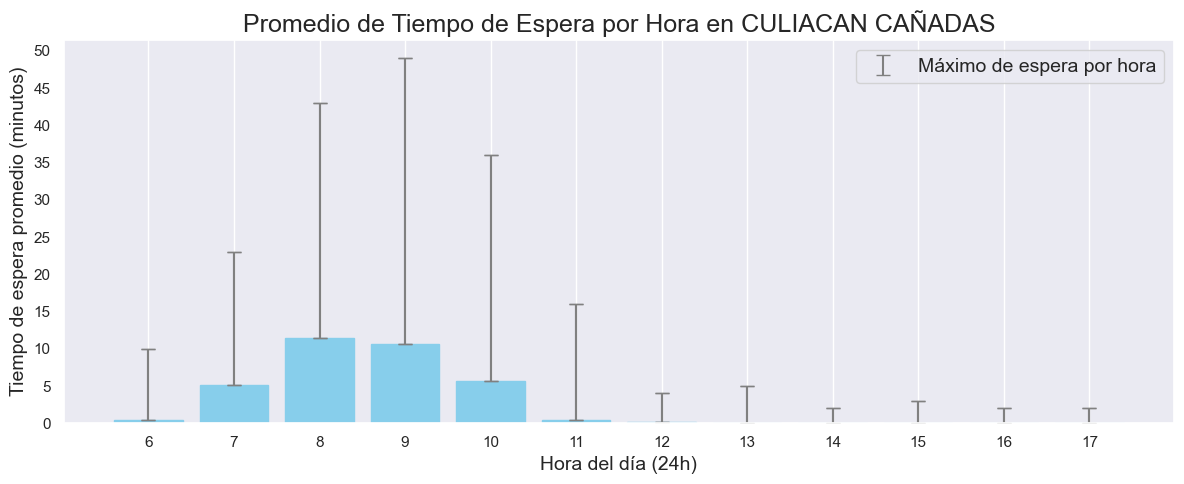

In [4]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN CAÑADAS", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 55, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCAN.png', dpi=300)

In [5]:
df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 30]

,id,prioridad,hora_llegada,hora_inicio,espera_min,caja,hora
2214,99,0,2024-03-08 08:09:00,2024-03-08 08:41:00,32.0,3,8
2217,104,0,2024-03-08 08:15:00,2024-03-08 08:46:00,31.0,1,8
2218,105,0,2024-03-08 08:16:00,2024-03-08 08:47:00,31.0,2,8
2220,107,0,2024-03-08 08:19:00,2024-03-08 08:50:00,31.0,1,8
3376,98,0,2024-03-12 07:54:00,2024-03-12 08:25:00,31.0,1,8
...,...,...,...,...,...,...,...
7678,107,0,2024-03-26 08:12:00,2024-03-26 08:43:00,31.0,1,8
8003,144,0,2024-03-27 08:49:00,2024-03-27 09:20:00,31.0,1,9
8014,155,0,2024-03-27 09:01:00,2024-03-27 09:34:00,33.0,1,9
8015,156,0,2024-03-27 09:03:00,2024-03-27 09:34:00,31.0,3,9


In [11]:
df2

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
37332,437442,CULIACAN CAÑADAS,20240301,6,41692123,N006,Solicitar Estudios,06:29:05,06:38:23,9.30,2.620000,2024-03-01 06:29:05,3,0
37333,437458,CULIACAN CAÑADAS,20240301,6,41693739,P002,Triage,06:49:13,06:49:25,0.20,1.370000,2024-03-01 06:49:13,3,1
37334,437474,CULIACAN CAÑADAS,20240301,7,41696332,F001,Cotizacion,07:05:17,07:05:42,0.42,2.100000,2024-03-01 07:05:17,3,1
37335,437490,CULIACAN CAÑADAS,20240301,7,41701774,N041,Solicitar Estudios,07:21:39,07:36:43,15.07,3.518992,2024-03-01 07:21:39,3,1
37336,437506,CULIACAN CAÑADAS,20240301,7,41706287,N055,Solicitar Estudios,07:38:40,08:01:18,22.63,2.900000,2024-03-01 07:38:40,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58050,445616,CULIACAN CAÑADAS,20240327,12,43477567,P014,Triage,12:04:55,12:08:50,3.92,3.770000,2024-03-27 12:04:55,3,0
58051,445632,CULIACAN CAÑADAS,20240327,13,43481917,N148,Citados sin folio,13:08:34,13:08:38,0.07,1.430000,2024-03-27 13:08:34,3,0
58052,445648,CULIACAN CAÑADAS,20240327,13,43484867,C026,Citado,13:53:20,13:53:27,0.12,8.550000,2024-03-27 13:53:20,3,1
58053,445664,CULIACAN CAÑADAS,20240327,15,43488725,N161,Solicitar Estudios,15:02:08,15:02:17,0.15,3.518992,2024-03-27 15:02:08,3,1


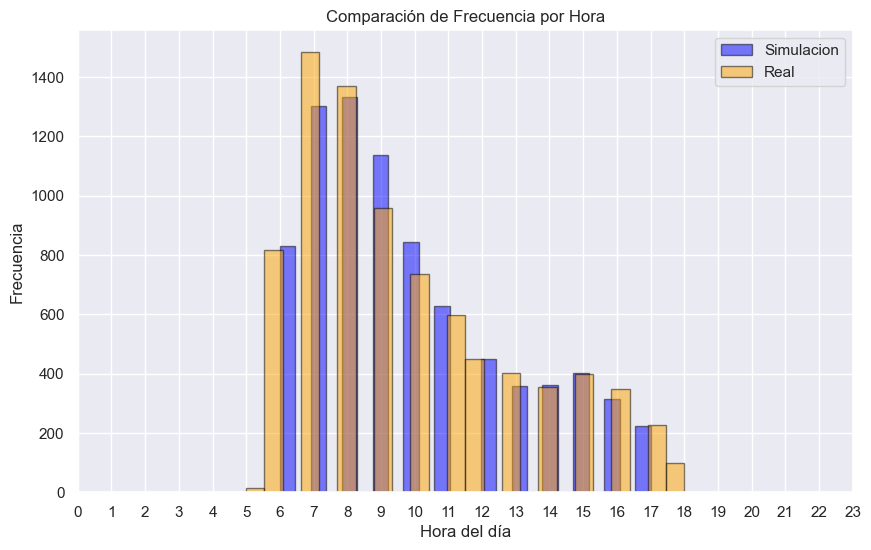

<Figure size 640x480 with 0 Axes>

In [13]:
df2 = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
plt.figure(figsize=(10, 6))
plt.hist(df_simulacion_atencion['hora'], bins=24, alpha=0.5, label='Simulacion', color='blue', edgecolor='black')
plt.hist(df2['HoraLLegada'], bins=24, alpha=0.5, label='Real', color='orange', edgecolor='black')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencia por Hora')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


plt.tight_layout()

plt.savefig("numpacientes.png", dpi=300)